##2D Seed Phenotyping with Pixelflow Demo
#####This notebook demonstrates how to use pixelflow to extract measurements of segmented objects from 2D imagery. This demo will use 2D lightbox images of Oilseed rape (Brassica napus) seedpods detected and segmented using an adapted StarDist model as described in [Corcoran et al. 2023](https://www.frontiersin.org/articles/10.3389/fpls.2023.1120182/full).

###1. Install and load relevant packages

In [ ]:
!pip install -e git+https://github.com/alan-turing-institute/pixelflow.git#egg=pixelflow

Obtaining pixelflow from git+https://github.com/alan-turing-institute/pixelflow.git#egg=pixelflow
  Cloning https://github.com/alan-turing-institute/pixelflow.git to ./src/pixelflow
  Running command git clone --filter=blob:none --quiet https://github.com/alan-turing-institute/pixelflow.git /content/src/pixelflow
  Resolved https://github.com/alan-turing-institute/pixelflow.git to commit de906401855685e94859ad8b2514c41f92b09144
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 17.7 MB/s eta 0:00

In [ ]:
!pip show pixelflow

Name: pixelflow
Version: 0.1.dev58
Summary: Pixelflow
Home-page: 
Author: 
Author-email: "Alan R. Lowe" <alowe@turing.ac.uk>
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Editable project location: /content/src/pixelflow
Requires: matplotlib, numpy, pandas, porespy, scikit-image
Required-by: 


In [ ]:
#workaround for google colab loading issue
import site
site.main()

In [ ]:
from pixelflow import pixelflow, pixelflow_custom
#from pixelflow.simulate import simulated_image
from skimage.measure import label

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from tifffile import imread
import pandas as pd

###Load original image (img) and segmented seed labels (mask). Example images for this notebook can be found [here](https://zenodo.org/record/8355920)

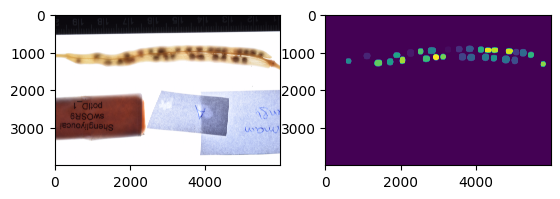

In [ ]:
#img = simulated_image(num_blobs=5)
img = imread('01_Shengliyoucai_main_A.tif')
mask = np.load('01_Shengliyoucai_main_A.npy')

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(mask)

### Extract location information (bounding boxes and centroids) and 2D measurements for each labelled seed as pixelflow features table

In [ ]:
features = pixelflow(
    mask,
    img,
    features=('label', 'bbox', 'centroid', 'area', 'equivalent_diameter', 'major_axis_length', 'minor_axis_length', 'orientation', 'solidity'),
    #custom=(custom_func)
)

YX image detected


In [ ]:
features

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,area,equivalent_diameter,major_axis_length,minor_axis_length,orientation,solidity
0,1,836,3741,1007,3946,921.985622,3842.008885,29489,193.769350,214.238805,176.132904,-1.526456,0.991394
1,2,845,3469,1015,3653,929.565905,3560.254431,26121,182.368556,191.138772,174.656061,1.527223,0.990971
2,3,858,3184,1023,3350,939.865184,3266.956524,23024,171.216434,172.458656,170.550098,1.125368,0.991858
3,4,861,4054,1024,4222,941.734972,4137.623246,23307,172.265476,175.894046,169.307549,-1.321100,0.992463
4,5,877,2725,1060,2948,968.002022,2833.796571,34125,208.444955,232.305023,187.909409,-1.464616,0.992208
5,6,881,4415,1031,4600,955.284292,4505.749351,23511,173.017730,193.659953,155.409191,-1.469039,0.991314
6,7,886,4240,1027,4417,957.429128,4328.004975,21306,164.704711,186.639258,146.354487,1.552611,0.987486
7,8,906,4795,1065,4989,985.053576,4890.445039,25982,181.882682,201.369982,165.243618,-1.493392,0.991188
8,9,910,2463,1071,2615,989.127739,2538.106640,20949,163.318998,168.584991,158.816674,-0.157770,0.992138
9,10,924,4993,1094,5161,1008.590550,5076.098617,24296,175.882427,178.035456,174.424010,0.553507,0.992646


###Display number of labelled seeds in dataset

In [ ]:
features.count()

29

###Calculate the total area of all labelles seeds

In [ ]:
features.sum("area")

765454

###Save and export features table as .CSV

In [ ]:
#output csv with measurements
features_csv = features.to_csv('01_Shengliyoucai_main_A.csv', header=True, index=False)